In [21]:
103 % 100

3

In [1]:
import os
import argparse
from typing import List

# Third-party imports
import torch
import yaml
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data
import json

# First-party imports
from models.mixing_network import MixingNetwork
from models.simple_network import SimplePeriodicNetwork

from modules.property_prediction import (
    SevenNetPropertiesPredictor,
    AseCalculatorPropertiesPredictor,
    RandomPropertiesPredictor,
)

from modules.train import Trainer

from ase.io import read

def find_extended_sevennet_conductivity(  # pylint: disable=R0913, R0914, R0917, R1702
    root_folders
):
    """
    Constructs an extended dataset of atomic structures with diffusion properties
    based on sevennet inputs.
    """

    li_conductivity = []
    elements = []

    for root_folder in root_folders:
        slopes_file = os.path.join(root_folder, "slopes.json")

        with open(slopes_file, "r", encoding="utf-8") as file:
            slopes_info = json.load(file)

        for folder in os.listdir(root_folder):
            if "runs-1000K" in folder:
                for mp_id in os.listdir(os.path.join(root_folder, folder)):
                    if (
                        ".output" not in mp_id
                        and ".dvc" not in mp_id
                        and ".gitignore" not in mp_id
                    ):
                        name = os.path.join(folder, mp_id)
                        if name in slopes_info.keys():
                            li_conductivity.append(max(1e-8, slopes_info[name]["Li"]))

                        full_path = os.path.join(root_folder, folder, mp_id)
                        relaxed_structure_path = os.path.join(
                                full_path, "relax_02.traj"
                            )
                        
                        relaxed_structure = read(relaxed_structure_path, index=-1)
                        elements.extend(relaxed_structure.get_chemical_symbols())
    return li_conductivity, elements

In [2]:
root_folders = ["/mnt/hdd/maevskiy/SuperionicToy-runs/mp-sevennet/v0-2025-02-19",
                "/mnt/hdd/maevskiy/SuperionicToy-runs/mp-sevennet/v0-2025-02-20",
                "/mnt/hdd/maevskiy/SuperionicToy-runs/mp-sevennet/v0-2025-02-21"]

In [3]:
cond_1000_new_data, elements_new_data = find_extended_sevennet_conductivity(root_folders)

In [4]:
type(cond_1000_new_data)

list

In [5]:
import pandas as pd

df = pd.read_csv('../data/sevennet_slopes.csv')
df['v1_Li_slope'] = df['v1_Li_slope'].clip(lower=1e-4)

In [6]:
cond_1000_old_data = df[df['temperature'] == 1000]['v1_Li_slope'].to_list()

In [7]:
type(cond_1000_old_data)

list

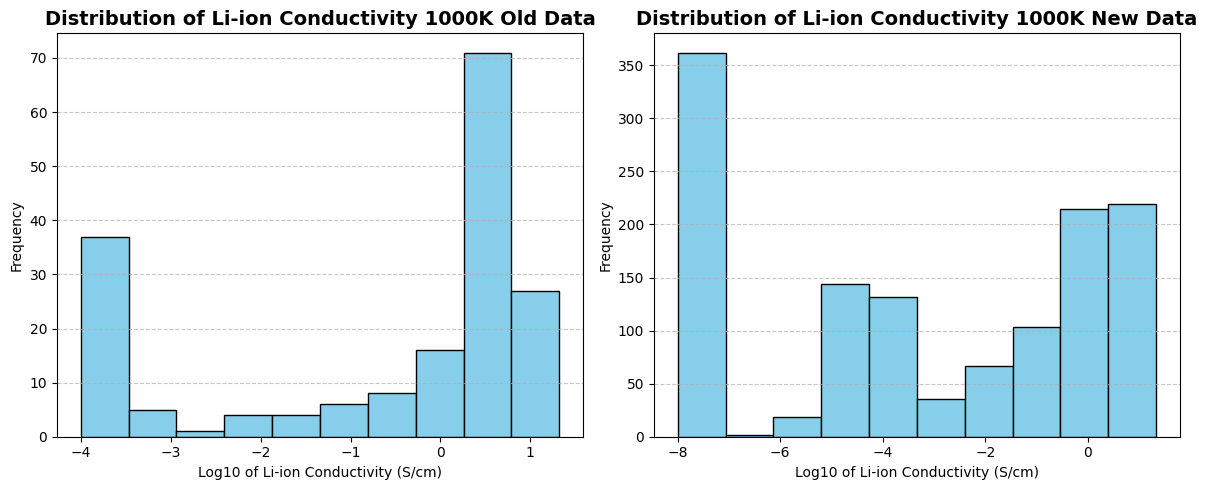

In [8]:
import numpy as np
import matplotlib.pyplot as plt


# Создаем холст с двумя подграфиками (в две строки и одну колонку)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 2 строки, 1 колонка

# Второй график
axes[0].hist(np.log10(cond_1000_old_data), bins=10, color='skyblue', edgecolor='black')
axes[0].set_title("Distribution of Li-ion Conductivity 1000K Old Data", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Log10 of Li-ion Conductivity (S/cm)")
axes[0].set_ylabel("Frequency")
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Первый график
axes[1].hist(np.log10(cond_1000_new_data), bins=10, color='skyblue', edgecolor='black')
axes[1].set_title("Distribution of Li-ion Conductivity 1000K New Data", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Log10 of Li-ion Conductivity (S/cm)")
axes[1].set_ylabel("Frequency")
axes[1].grid(axis='y', linestyle='--', alpha=0.7)


# Подгоняем макет, чтобы графики не накладывались
plt.tight_layout()

# Показываем графики
plt.show()


In [9]:
cond_1000_new_data

[1e-08,
 1e-08,
 1e-08,
 7.089059823604761,
 1e-08,
 0.30922852757241354,
 1e-08,
 4.767614081662761,
 0.0001551501309163346,
 1e-08,
 1e-08,
 1e-08,
 3.5245016936803284e-05,
 2.3542800345164845,
 0.9400913535748269,
 4.864662441166563e-06,
 2.470971410270384,
 1e-08,
 0.04059678807697598,
 1.9963297175963037,
 1e-08,
 9.653328938969774e-05,
 7.6243008933655565,
 0.8785016243051801,
 1e-08,
 0.00017857941230033303,
 1.0552566114385789,
 1e-08,
 0.006271138027326202,
 2.013978862997474,
 9.888426042833487,
 8.726442877061757e-05,
 6.316101185394368e-05,
 0.03800250962567137,
 0.2544945042218929,
 0.00011979564420501998,
 0.004645965495291136,
 4.054705089005172,
 6.549637708570477e-06,
 1e-08,
 2.4713507083267617e-05,
 0.08280803053646744,
 8.090290958072615,
 2.7477123347844618e-05,
 2.792464880179598e-05,
 1e-08,
 6.531840161529446e-06,
 0.4168298711644582,
 3.2475001161531916,
 4.524378525412053e-05,
 0.06282756345357854,
 0.00011112025206916062,
 1e-08,
 1e-08,
 1e-08,
 1e-08,
 1e-0

In [13]:
elements_new_data

['Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Na',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'O',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Ba',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 'Li',
 '

In [17]:
from pymatgen.core.periodic_table import Element

def get_chemical_number(element_symbol):
    atomic_number = Element(element_symbol).Z
    return atomic_number

atomic_numbers = []
for elem in set(elements_new_data):
    atomic_numbers.append(get_chemical_number(elem))
# atomic_numbers = set(map(get_chemical_number, set(elements_new_data)))

print(sorted(atomic_numbers))

[1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 17, 19, 20, 31, 32, 33, 34, 35, 37, 38, 49, 50, 51, 52, 53, 54, 55, 56, 58, 59, 60, 62, 63, 64, 65, 66, 67, 68, 69, 71, 81, 82, 83, 90, 91, 92, 93]


In [19]:
import torch
import torch_scatter

src = torch.tensor([1, 2, 3, 4, 5])  # Values to sum
index = torch.tensor([0, 2, 0, 2, 0])  # Grouping indices

out = torch_scatter.scatter_sum(src, index, dim=0)
print(out)  # tensor([1+3+5, 2+4]) -> tensor([9, 6])


tensor([9, 0, 6])
